# Applied Data Visualization – Set Visualization



In [3]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('default')
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg', 'pdf')

## Venn Diagrams

Venn diagrams are great when you have up to three sets. A good implementation, based on matplotlib is [matplotlib-venn](https://github.com/konstantint/matplotlib-venn), which we'll be using here. 

Matplotlib-venn can draw 2 and 3 set venn diagrams. 

In [4]:
#!pip install matplotlib_venn

In [5]:
import matplotlib_venn as venn

In matplotlib venn you have to explicitly specify the intersection sizes. Here is a basic example of a two-set venn diagram with to sets A and B. A has a size of 13, B of 8, and the overlap is 3. We specify this as `10, 5, 3`. 

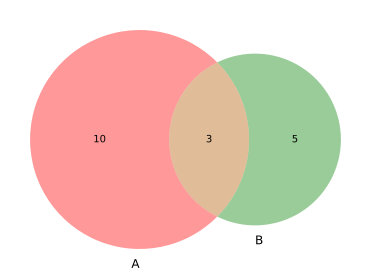

In [6]:
venn.venn2(subsets = (10, 5, 3), set_labels = ('A', 'B'))
plt.show()

The drawing functions also take a list of sets of strings. Here is a basic example: 

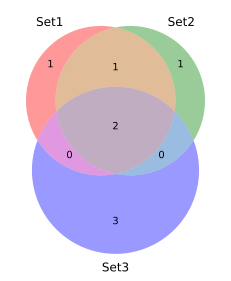

In [7]:
set1 = set(['A', 'B', 'C', 'D'])
set2 = set(['B', 'C', 'D', 'E'])
set3 = set(['C', 'D',' E', 'F', 'G'])

venn.venn3([set1, set2, set3], ('Set1', 'Set2', 'Set3'))
plt.show()

Here we already see that this venn diagram isn't perfectly area-proportional, as 0 clearly has non-0 drawing space. 

Now, let's load the simpsons dataset and convert it to a useful format.

In [8]:
# load from file
simpsons = pd.read_csv('simpsons.csv', delimiter=';')
simpsons.head(20)

,Name,School,Blue Hair,Duff Fan,Evil,Male,Power Plant,Age
0,Lisa,1,0,0,0,0,0,8
1,Bart,1,0,0,0,1,0,10
2,Homer,0,0,1,0,1,1,40
3,Marge,0,1,0,0,0,0,36
4,Maggie,0,0,0,0,0,0,1
5,Barney,0,0,1,0,1,0,39
6,Mr. Burns,0,0,0,1,1,1,90
7,Mo,0,0,1,0,1,0,41
8,Ned,0,0,0,0,1,0,42
9,Milhouse,1,1,0,0,1,0,10


In [9]:
def to_set_list(labels, column):
    return set(labels[column == 1].tolist())


In [10]:
school = to_set_list(simpsons["Name"], simpsons["School"])
blue = to_set_list(simpsons["Name"], simpsons["Blue Hair"])
male = to_set_list(simpsons["Name"], simpsons["Male"])

school, blue, male

({'Bart', 'Lisa', 'Martin Prince', 'Milhouse', 'Nelson', 'Ralph'},
 {'Jacqueline Bouvier ', 'Marge', 'Milhouse'},
 {'Barney',
  'Bart',
  'Carl Carlson',
  'Fat Tony',
  'Grampa',
  'Homer',
  'Kent Brockman',
  'Krusty',
  'Lenny Leonard',
  'Martin Prince',
  'Milhouse',
  'Mo',
  'Mr. Burns',
  'Ned',
  'Nelson',
  'Ralph',
  'Sideshow Bob',
  'Smithers'})

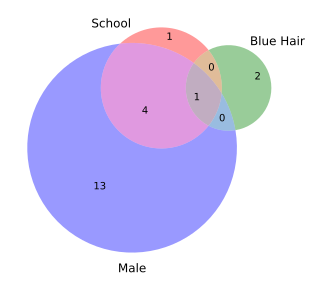

In [11]:
venn.venn3([school, blue, male], ["School", "Blue Hair", "Male"])

In [12]:
duff = to_set_list(simpsons["Name"], simpsons["Duff Fan"])
evil = to_set_list(simpsons["Name"], simpsons["Evil"])
power = to_set_list(simpsons["Name"], simpsons["Power Plant"])

duff, evil, power

({'Barney', 'Carl Carlson', 'Homer', 'Krusty', 'Lenny Leonard', 'Mo'},
 {'Fat Tony', 'Krusty', 'Mr. Burns', 'Nelson', 'Sideshow Bob', 'Smithers'},
 {'Carl Carlson', 'Homer', 'Lenny Leonard', 'Mr. Burns', 'Smithers'})

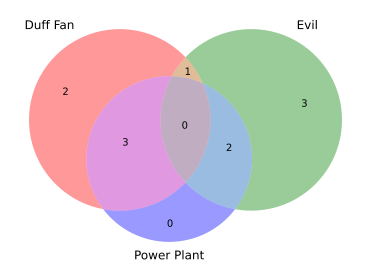

In [13]:
venn.venn3([duff, evil, power], ["Duff Fan", "Evil", "Power Plant"])

There is also [SuperVenn](https://github.com/gecko984/supervenn), which uses a similar syntax but creates line diagrams. 

In [14]:
#!pip install supervenn

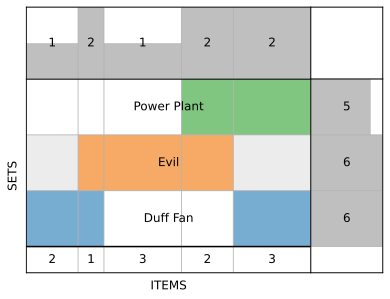

In [15]:
import supervenn as sv

sv.supervenn([duff, evil, power], ["Duff Fan", "Evil", "Power Plant"])

## UpSet Plots

There are multiple implementations of UpSet plots, but we'll be using the [Python UpSetPlot one](https://upsetplot.readthedocs.io/en/stable/index.html#) because it seems to be the best maintained version. 

In [12]:
#!pip install upsetplot

In [13]:
import upsetplot

UpSetPlot uses a nested index datastructure that is a bit unusual, so what we should do instead is to use the `from_contents()` or the `from_memberships()` methods to convert a more standard dataset into the required data structure. 

`from_contents()` takes lists (that represent sets) that contain explicit memberships: 

In [14]:
school = ['Lisa', 'Bart', 'Milhouse']
blue = ['Lisa', 'Marge', 'Milhouse']
male = ['Bart', 'Homer', 'Milhouse', 'Smithers', 'Mr. Burns']

sim_dict = {'school': school,'blue': blue, 'male': male}
df = upsetplot.from_contents(sim_dict)
df

id
school blue  male            
True   True  False       Lisa
       False True        Bart
       True  True    Milhouse
False  True  False      Marge
       False True       Homer
             True    Smithers
             True   Mr. Burns

{'matrix': <Axes: >,
 'shading': <Axes: >,
 'totals': <Axes: >,
 'intersections': <Axes: ylabel='Intersection size'>}

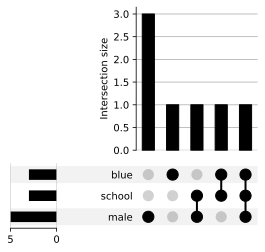

In [15]:
upsetplot.plot(df)

We can use `from_memberships()` to load data from a table:

In [16]:
# convert integer to true/false column
columns = ["School", "Blue Hair", "Duff Fan", "Evil", "Male", "Power Plant"]
simpsons[columns] = simpsons[columns].astype(bool)
simpsons.head()

,Name,School,Blue Hair,Duff Fan,Evil,Male,Power Plant,Age
0,Lisa,True,False,False,False,False,False,8
1,Bart,True,False,False,False,True,False,10
2,Homer,False,False,True,False,True,True,40
3,Marge,False,True,False,False,False,False,36
4,Maggie,False,False,False,False,False,False,1


In [17]:
up_simpsons = upsetplot.from_indicators(columns, data=simpsons)
up_simpsons

Name  \
School Blue Hair Duff Fan Evil  Male  Power Plant                        
True   False     False    False False False                       Lisa   
                                True  False                       Bart   
False  False     True     False True  True                       Homer   
       True      False    False False False                      Marge   
       False     False    False False False                     Maggie   
                 True     False True  False                     Barney   
                 False    True  True  True                   Mr. Burns   
                 True     False True  False                         Mo   
                 False    False True  False                        Ned   
True   True      False    False True  False                   Milhouse   
False  False     False    False True  False                     Grampa   
                 True     True  True  False                     Krusty   
                 False    True  True  True                    Smithers   
True   False     False    False True  False                      Ralph   
False  False     False    True  True  False               Sideshow Bob   
                          False True  False              Kent Brockman   
                          True  True  False                   Fat Tony   
       True      False    False False False        Jacqueline Bouvier    
       False     False    False False False              Patty Bouvier   
                                      False              Selma Bouvier   
                 True     False True  True               Lenny Leonard   
                                      True                Carl Carlson   
True   False     False    True  True  False                     Nelson   
                          False True  False              Martin Prince   

                                                   School  Blue Hair  \
School Blue Hair Duff Fan Evil  Male  Power Plant                      
True   False     False    False False False          True      False   
                                True  False          True      False   
False  False     True     False True  True          False      False   
       True      False    False False False         False       True   
       False     False    False False False         False      False   
                 True     False True  False         False      False   
                 False    True  True  True          False      False   
                 True     False True  False         False      False   
                 False    False True  False         False      False   
True   True      False    False True  False          True       True   
False  False     False    False True  False         False      False   
                 True     True  True  False         False      False   
                 False    True  True  True          False      False   
True   False     False    False True  False          True      False   
False  False     False    True  True  False         False      False   
                          False True  False         False      False   
                          True  True  False         False      False   
       True      False    False False False         False       True   
       False     False    False False False         False      False   
                                      False         False      False   
                 True     False True  True          False      False   
                                      True          False      False   
True   False     False    True  True  False          True      False   
                          False True  False          True      False   

                                                   Duff Fan   Evil   Male  \
School Blue Hair Duff Fan Evil  Male  Power Plant                           
True   False     False    False False False           False  False  False   
                                True 

{'matrix': <Axes: >,
 'shading': <Axes: >,
 'totals': <Axes: >,
 'intersections': <Axes: ylabel='Intersection size'>}

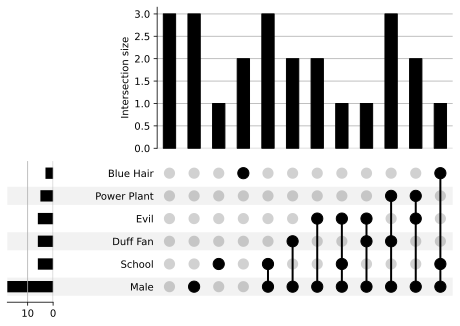

In [18]:
upsetplot.plot(up_simpsons)

UpSetPlot also lets you change rendering parameters and do selections. Here we highlight all the sets of degree 3 or more. 

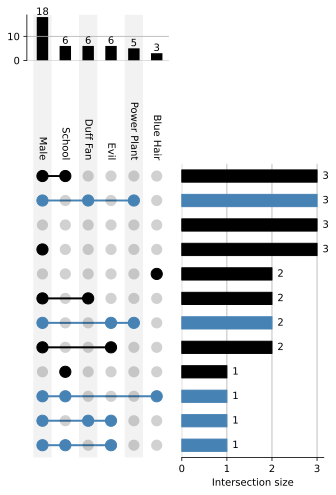

In [19]:
simpsons_styled_plot = upsetplot.UpSet(up_simpsons, show_counts=True, sort_by='cardinality', orientation='vertical')
simpsons_styled_plot.style_subsets(min_degree=3, facecolor='steelblue')
simpsons_styled_plot


### Larger Data

Now let's load a real dataset that shows the scalabilit of UpSet. We'll load a MovieLense dataset of movies and genres:

In [20]:
movies = pd.read_csv('movies.csv', delimiter=';')
movies.head()

,Name,ReleaseDate,Action,Adventure,Children,Comedy,Crime,Documentary,Drama,Fantasy,...,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western,AvgRating,Watches
0,Toy Story (1995),1995,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,4.15,2077
1,Jumanji (1995),1995,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,3.20,701
2,Grumpier Old Men (1995),1995,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,3.02,478
3,Waiting to Exhale (1995),1995,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,2.73,170
4,Father of the Bride Part II (1995),1995,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,3.01,296


In [21]:
# get a list of the columns, because we need to convert some of them to boolean
m_columns = movies.columns.tolist()
m_columns

['Name',
 'ReleaseDate',
 'Action',
 'Adventure',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'SciFi',
 'Thriller',
 'War',
 'Western',
 'AvgRating',
 'Watches']

In [22]:
genres = m_columns[2:-2]
genres

['Action',
 'Adventure',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'SciFi',
 'Thriller',
 'War',
 'Western']

In [23]:
movies[genres] = movies[genres].astype(bool)
movies.head()

,Name,ReleaseDate,Action,Adventure,Children,Comedy,Crime,Documentary,Drama,Fantasy,...,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western,AvgRating,Watches
0,Toy Story (1995),1995,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,4.15,2077
1,Jumanji (1995),1995,False,True,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,3.20,701
2,Grumpier Old Men (1995),1995,False,False,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,3.02,478
3,Waiting to Exhale (1995),1995,False,False,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,2.73,170
4,Father of the Bride Part II (1995),1995,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,3.01,296


In [24]:
up_movies = upsetplot.from_indicators(genres, data=movies)

With all genres, the plot is quite large; and I've already set the minimum subset size to 3. 

{'matrix': <Axes: >,
 'shading': <Axes: >,
 'totals': <Axes: >,
 'intersections': <Axes: xlabel='Intersection size'>}

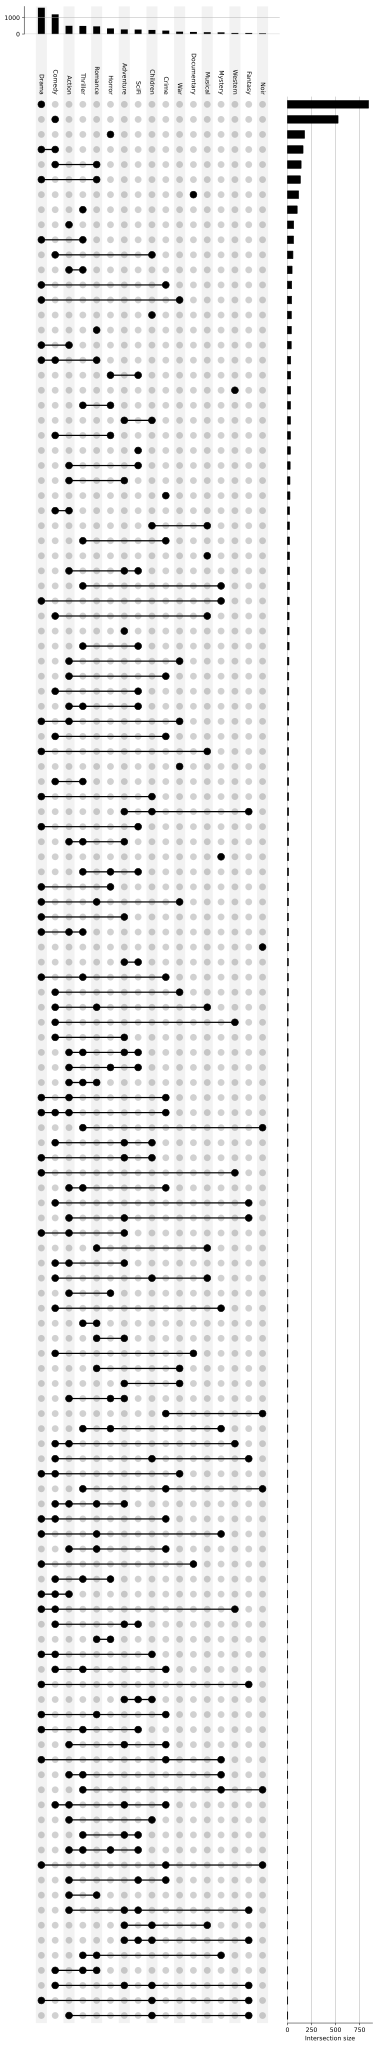

In [25]:
upsetplot.plot(up_movies, sort_by='cardinality', orientation='vertical', min_subset_size=3)

So let's select a couple of key genres, and dial up the subset size to 10. Also, we want to visualize attributes about the subsets, and UpSetPlot allows us to do this with [Seaborn catplots](https://seaborn.pydata.org/generated/seaborn.catplot.html)!

{'matrix': <Axes: >,
 'shading': <Axes: >,
 'totals': <Axes: >,
 'intersections': <Axes: xlabel='Intersection size'>,
 'extra1': <Axes: xlabel='AvgRating', ylabel='_bin'>}

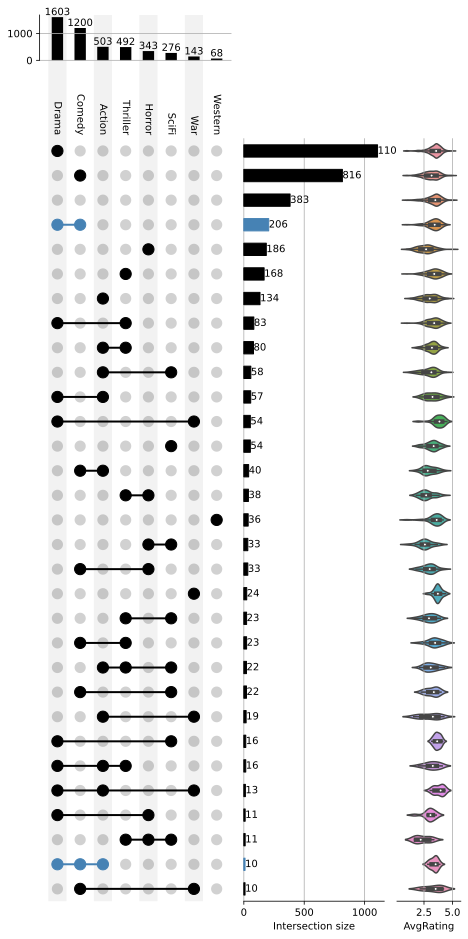

In [26]:
key_genres = ['Action', 'Comedy', 'Drama', 'Horror', 'SciFi', 'Thriller', 'War', 'Western']
up_movies_df = upsetplot.from_indicators(key_genres, data=movies)
up_movies_plot = upsetplot.UpSet(up_movies_df, sort_by='-cardinality', orientation='vertical', min_subset_size=10, show_counts=True)
up_movies_plot.style_subsets(present=['Drama', 'Comedy'], facecolor='steelblue')
up_movies_plot.add_catplot(value='AvgRating', kind='violin')
up_movies_plot.plot()

## Co-Occurence Matrix

In [27]:
movies = pd.read_csv('movies.csv', delimiter=';')

# muliplying the genres columns with the transpose of itself gets us the co-occurrence matrix
co_occurrence_matrix = movies[genres].T @ movies[genres]

counts = []
# Set the diagonal elements to zero, they would ruin our color scale 
for i in range(len(co_occurrence_matrix)):
    counts.append(co_occurrence_matrix.iloc[i, i])
    co_occurrence_matrix.iloc[i, i] = 0

co_occurrence_matrix.head()

,Action,Adventure,Children,Comedy,Crime,Documentary,Drama,Fantasy,Noir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western
Action,0,128,13,65,55,0,100,15,0,25,3,12,35,107,133,46,10
Adventure,128,0,81,44,9,0,33,35,1,8,9,3,27,67,31,12,4
Children,13,81,0,93,0,0,27,38,0,1,37,2,7,14,1,2,2
Comedy,65,44,93,0,36,4,226,19,1,41,41,13,204,31,31,18,17
Crime,55,9,0,36,0,0,90,1,15,6,0,13,9,6,58,0,0


/Users/alex/anaconda3/envs/Oct23/lib/python3.11/site-packages/seaborn/matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/Users/alex/anaconda3/envs/Oct23/lib/python3.11/site-packages/seaborn/matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


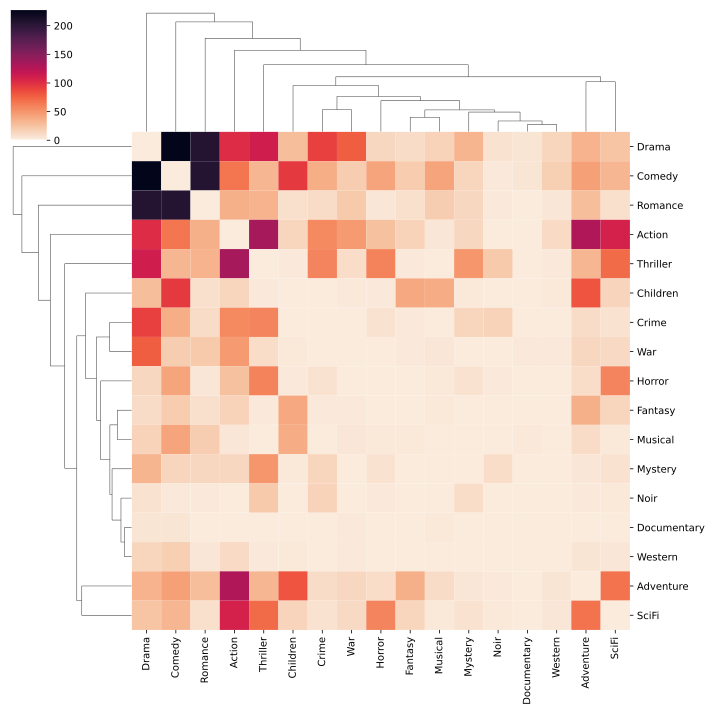

In [28]:
# Plot the co-occurrence matrix with seaborn    
import seaborn as sns
# use a cluster heatmap to group similar genres together
sns.clustermap(co_occurrence_matrix, cmap="rocket_r")



The above plot shows the co-occurence nicely; but notice that we still need to separately plot the "Just one Genre" cases.

In [29]:
# create a new dataframe with the genres as column and counts as rows: 
counts_and_singles = pd.DataFrame(counts, index=genres, columns=['counts'])

In [30]:
m_genres = movies[genres]

filtered_df = m_genres[m_genres.sum(axis=1) == 1]
single_genre = filtered_df.sum(axis=0)
single_genre.head

<bound method NDFrame.head of Action          65
Adventure       17
Children        40
Comedy         526
Crime           26
Documentary    116
Drama          843
Fantasy          1
Noir            10
Horror         178
Musical         21
Mystery         11
Romance         40
SciFi           30
Thriller       101
War             12
Western         33
dtype: int64>

In [31]:
counts_and_singles['singles'] = single_genre

In [32]:
counts_and_singles = counts_and_singles.reset_index(names="genre")
counts_and_singles.head()

,genre,counts,singles
0,Action,503,65
1,Adventure,283,17
2,Children,251,40
3,Comedy,1200,526
4,Crime,211,26


In [33]:
import altair as alt
myscale = scale=alt.Scale(domain=[0, 1700])

alt.Chart(counts_and_singles).mark_circle(size=60).encode(
    x=alt.X('counts:Q', scale=myscale ),
    y=alt.Y('singles:Q', scale=myscale),
    tooltip=['genre', 'counts', 'singles']
# make the axis be on the same scale 
).interactive()

alt.Chart(...)